In [1]:
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('machine_temperature_system_failure.csv')

# Exclude datetime column
data_values = data.drop('timestamp',
						axis=1).values

# Convert data to float type
data_values = data_values.astype('float32')

# Create new dataframe with converted values
data_converted = pd.DataFrame(data_values,
							columns=data.columns[1:])

# Add back datetime column
data_converted.insert(0, 'timestamp',
					data['timestamp'])


In [3]:
data_converted = data_converted.dropna()

In [4]:
# Exclude datetime column again
data_tensor = tf.convert_to_tensor(data_converted.drop(
	'timestamp', axis=1).values, dtype=tf.float32)

# Define the autoencoder model
input_dim = data_converted.shape[1] - 1
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='relu')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile and fit the model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(data_tensor, data_tensor, epochs=50,
				batch_size=32, shuffle=True)

# Calculate the reconstruction error for each data point
reconstructions = autoencoder.predict(data_tensor)
mse = tf.reduce_mean(tf.square(data_tensor - reconstructions),
					axis=1)
anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores')
anomaly_scores.index = data_converted.index

Epoch 1/50
710/710 [==============================] - 6s 7ms/step - loss: 1349.5306
Epoch 2/50
710/710 [==============================] - 3s 4ms/step - loss: 0.0682
Epoch 3/50
710/710 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 4/50
710/710 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 5/50
710/710 [==============================] - 1s 2ms/step - loss: 0.0104
Epoch 6/50
710/710 [==============================] - 1s 2ms/step - loss: 0.0102
Epoch 7/50
710/710 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 8/50
710/710 [==============================] - 1s 2ms/step - loss: 0.0097
Epoch 9/50
710/710 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 10/50
710/710 [==============================] - 1s 2ms/step - loss: 0.0087
Epoch 11/50
710/710 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 12/50
710/710 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 13/50
710/710 [=

In [5]:
threshold = anomaly_scores.quantile(0.99)
anomalous = anomaly_scores > threshold
binary_labels = anomalous.astype(int)
precision, recall,f1_score, _ = precision_recall_fscore_support( binary_labels, anomalous, average='binary')


In [6]:
test = data_converted['value'].values
predictions = anomaly_scores.values
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


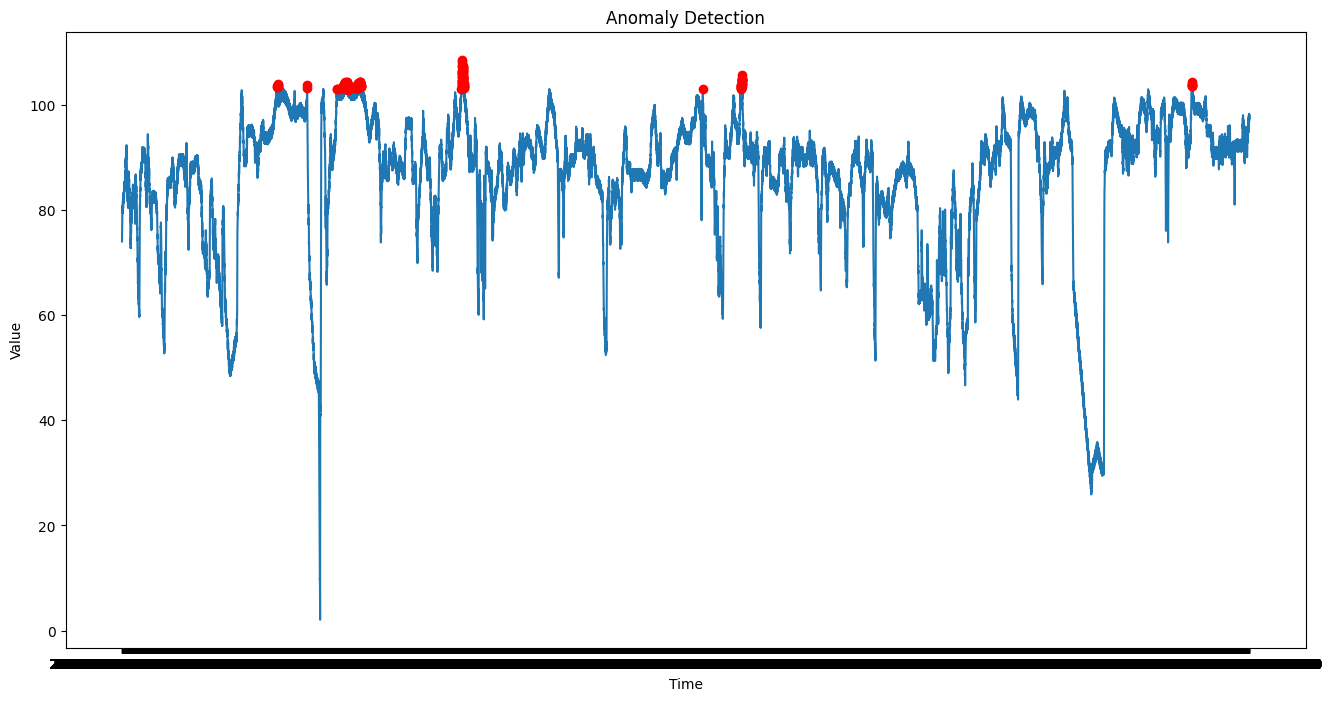

In [7]:
# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
plt.plot(data_converted['timestamp'],
		data_converted['value'])
plt.plot(data_converted['timestamp'][anomalous],
		data_converted['value'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [8]:
data = pd.read_csv('cpu_utilization_asg_misconfiguration.csv')

# Exclude datetime column
data_values = data.drop('timestamp',
						axis=1).values

# Convert data to float type
data_values = data_values.astype('float32')

# Create new dataframe with converted values
data_converted = pd.DataFrame(data_values,
							columns=data.columns[1:])

# Add back datetime column
data_converted.insert(0, 'timestamp',
					data['timestamp'])

In [9]:
data_converted = data_converted.dropna()

In [10]:
# Exclude datetime column again
data_tensor = tf.convert_to_tensor(data_converted.drop(
	'timestamp', axis=1).values, dtype=tf.float32)

# Define the autoencoder model
input_dim = data_converted.shape[1] - 1
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='relu')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile and fit the model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(data_tensor, data_tensor, epochs=50,
				batch_size=32, shuffle=True)

# Calculate the reconstruction error for each data point
reconstructions = autoencoder.predict(data_tensor)
mse = tf.reduce_mean(tf.square(data_tensor - reconstructions),
					axis=1)
anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores')
anomaly_scores.index = data_converted.index

Epoch 1/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1429
Epoch 2/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1443
Epoch 3/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1438
Epoch 4/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1422
Epoch 5/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1443
Epoch 6/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1421
Epoch 7/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1432
Epoch 8/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1436
Epoch 9/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1429
Epoch 10/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1437
Epoch 11/50
565/565 [==============================] - 1s 2ms/step - loss: 1710.1423
Epoch 12/50
565/565 [==============================] - 1s 2ms/step - loss:

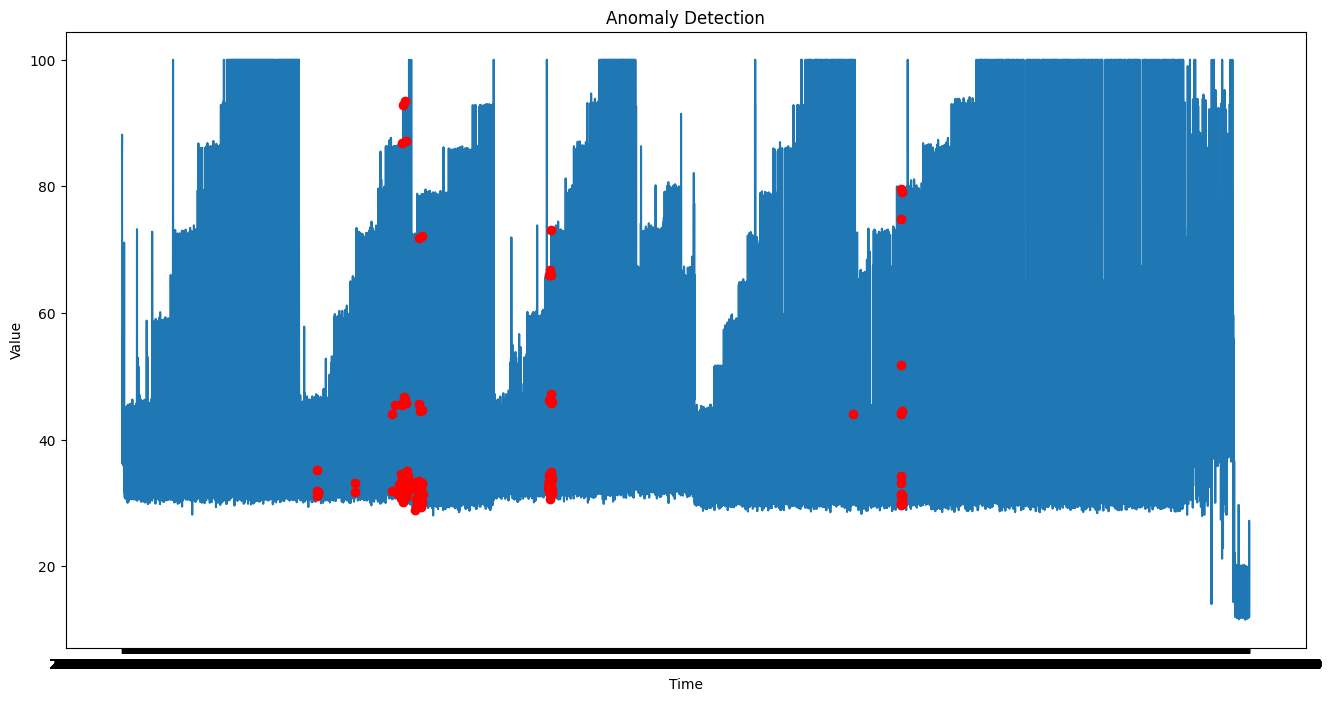

In [11]:
# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
plt.plot(data_converted['timestamp'],
		data_converted['value'])
plt.plot(data_converted['timestamp'][anomalous],
		data_converted['value'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()